In [1]:
### This module computes returns and mean-var frontier given each "expected" return based on averaged realized return
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### We can import the data set. The dataframe name is now df
### By default, date columns are represented as object when loading data from a CSV file
### We can read in the Date column 
df = pd.read_csv('###Alibaba_USD.csv', parse_dates=True)
### If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in the columns
### See date grouping codes in https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-
### date-in-a-non-unique-column
### If reading a .txt file, other options about in-between spaces may need to be specified, e.g. ...header=None, 
###    delimiter=r"\s+"...
### Columns can be renamed viz. ...pandas.read_csv('...',parse_dates=True,names=['col1','col2','col3','col4','col5','col6'])
### Note the parsed Date column cannot be renamed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1965 non-null   object 
 1   Open       1965 non-null   float64
 2   High       1965 non-null   float64
 3   Low        1965 non-null   float64
 4   Close      1965 non-null   float64
 5   Adj Close  1965 non-null   float64
 6   Volume     1965 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.6+ KB


In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,19/9/2014,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
1,22/9/2014,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2,23/9/2014,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
3,24/9/2014,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
4,25/9/2014,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [5]:
df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
print("\nNew DataFrame:") 
print(df)
### Note this split command does not work if ...parse_dates=['date']... is entered into the pd.read_csv(..)


New DataFrame:
           Date        Open        High         Low       Close   Adj Close  \
0     19/9/2014   92.699997   99.699997   89.949997   93.889999   93.889999   
1     22/9/2014   92.699997   92.949997   89.500000   89.889999   89.889999   
2     23/9/2014   88.940002   90.480003   86.620003   87.169998   87.169998   
3     24/9/2014   88.470001   90.570000   87.220001   90.570000   90.570000   
4     25/9/2014   91.089996   91.500000   88.500000   88.919998   88.919998   
...         ...         ...         ...         ...         ...         ...   
1960   5/7/2022  114.510002  120.529999  112.139999  120.129997  120.129997   
1961   6/7/2022  118.930000  120.000000  115.510002  119.120003  119.120003   
1962   7/7/2022  120.629997  125.000000  120.629997  122.389999  122.389999   
1963   8/7/2022  122.260002  125.839996  120.699997  120.900002  120.900002   
1964  11/7/2022  115.459999  115.580002  109.330002  109.570000  109.570000   

         Volume day month  year  
0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1965 non-null   object 
 1   Open       1965 non-null   float64
 2   High       1965 non-null   float64
 3   Low        1965 non-null   float64
 4   Close      1965 non-null   float64
 5   Adj Close  1965 non-null   float64
 6   Volume     1965 non-null   int64  
 7   day        1965 non-null   object 
 8   month      1965 non-null   object 
 9   year       1965 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 153.6+ KB


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,19/9/2014,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,19,9,2014
1,22/9/2014,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,22,9,2014
2,23/9/2014,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,23,9,2014
3,24/9/2014,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,24,9,2014
4,25/9/2014,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,25,9,2014


In [8]:
cols = df.select_dtypes(exclude=['float']).columns
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
### Above converts the Date, day. mnth, year from objects to float#
### errors = 'coerce' sets invalid parsing as NaN.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      float32
 1   Open       1965 non-null   float64
 2   High       1965 non-null   float64
 3   Low        1965 non-null   float64
 4   Close      1965 non-null   float64
 5   Adj Close  1965 non-null   float64
 6   Volume     1965 non-null   float32
 7   day        1965 non-null   float32
 8   month      1965 non-null   float32
 9   year       1965 non-null   float32
dtypes: float32(5), float64(5)
memory usage: 115.3 KB


In [9]:
### Select only rows where year >= 2017 and <=2021, i.e. 5 years
dfAlibaba = df[(df['year']>=2017)&(df['year']<=2021)]
dfAlibaba = dfAlibaba.drop('Date',axis=1) ### 1 is the axis number (0 for rows and 1 for columns)
### If we do not drop the Date column, Date will be shown as NaN
### Includes only rows where years are between 2017 and 2021 inclusive
### Next remove all columns except keeping Adj Close (closing price including dividends and split effects) and day, month, year
dfAlibaba = dfAlibaba[['Adj Close','day','month','year']]
print(dfAlibaba)

       Adj Close   day  month    year
576    88.599998   3.0    1.0  2017.0
577    90.510002   4.0    1.0  2017.0
578    94.370003   5.0    1.0  2017.0
579    93.889999   6.0    1.0  2017.0
580    94.720001   9.0    1.0  2017.0
...          ...   ...    ...     ...
1830  116.589996  27.0   12.0  2021.0
1831  114.800003  28.0   12.0  2021.0
1832  112.089996  29.0   12.0  2021.0
1833  122.989998  30.0   12.0  2021.0
1834  118.790001  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [10]:
### Next we process all the other 7 stocks in ECOMMERCE sector

In [11]:
dfAmazon = pd.read_csv('###Amazon_USD.csv',parse_dates=True)
dfAmazon[["day", "month", "year"]] = dfAmazon["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfAmazon.select_dtypes(exclude=['float']).columns
dfAmazon[cols] = dfAmazon[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfAmazon = dfAmazon[(dfAmazon['year']>=2017)&(dfAmazon['year']<=2021)]
dfAmazon = dfAmazon.drop('Date',axis=1)
dfAmazon = dfAmazon[['Adj Close','day','month','year']]

In [12]:
print(dfAmazon)
### Check to make sure this firm data also has same rows

       Adj Close   day  month    year
4941   37.683498   3.0    1.0  2017.0
4942   37.859001   4.0    1.0  2017.0
4943   39.022499   5.0    1.0  2017.0
4944   39.799500   6.0    1.0  2017.0
4945   39.846001   9.0    1.0  2017.0
...          ...   ...    ...     ...
6195  169.669495  27.0   12.0  2021.0
6196  170.660995  28.0   12.0  2021.0
6197  169.201004  29.0   12.0  2021.0
6198  168.644501  30.0   12.0  2021.0
6199  166.716995  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [13]:
dfEbay = pd.read_csv('###Ebay_USD.csv',parse_dates=True)
dfEbay[["day", "month", "year"]] = dfEbay["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfEbay.select_dtypes(exclude=['float']).columns
dfEbay[cols] = dfEbay[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfEbay = dfEbay[(dfEbay['year']>=2017)&(dfEbay['year']<=2021)]
dfEbay = dfEbay.drop('Date',axis=1)
dfEbay = dfEbay[['Adj Close','day','month','year']]

In [14]:
print(dfEbay)

      Adj Close   day  month    year
4598  28.413393   3.0    1.0  2017.0
4599  28.337217   4.0    1.0  2017.0
4600  28.575266   5.0    1.0  2017.0
4601  29.565544   6.0    1.0  2017.0
4602  29.279884   9.0    1.0  2017.0
...         ...   ...    ...     ...
5852  65.094376  27.0   12.0  2021.0
5853  65.510750  28.0   12.0  2021.0
5854  65.887474  29.0   12.0  2021.0
5855  66.204720  30.0   12.0  2021.0
5856  65.927132  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [15]:
dfRak= pd.read_csv('###Rakuten_USD.csv',parse_dates=True)
dfRak[["day", "month", "year"]] = dfRak["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfRak.select_dtypes(exclude=['float']).columns
dfRak[cols] = dfRak[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfRak= dfRak[(dfRak['year']>=2017)&(dfRak['year']<=2021)]
dfRak = dfRak.drop('Date',axis=1)
dfRak = dfRak[['Adj Close','day','month','year']]

In [16]:
print(dfRak)

      Adj Close   day  month    year
740       9.825   3.0    1.0  2017.0
741      10.100   4.0    1.0  2017.0
742      10.250   5.0    1.0  2017.0
743      10.520   6.0    1.0  2017.0
744      10.590   9.0    1.0  2017.0
...         ...   ...    ...     ...
1994      9.905  27.0   12.0  2021.0
1995      9.980  28.0   12.0  2021.0
1996     10.130  29.0   12.0  2021.0
1997     10.000  30.0   12.0  2021.0
1998     10.000  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [17]:
dfSun= pd.read_csv('###Suning_CNY.csv',parse_dates=True)
dfSun[["day", "month", "year"]] = dfSun["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfSun.select_dtypes(exclude=['float']).columns
dfSun[cols] = dfSun[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfSun= dfSun[(dfSun['year']>=2017)&(dfSun['year']<=2021)]
dfSun = dfSun.drop('Date',axis=1)
dfSun = dfSun[['Adj Close','day','month','year']]

In [18]:
print(dfSun)

      Adj Close   day  month    year
3054  11.436833   3.0    1.0  2017.0
3055  11.446534   4.0    1.0  2017.0
3056  11.407731   5.0    1.0  2017.0
3057  11.233124   6.0    1.0  2017.0
3058  11.213723   9.0    1.0  2017.0
...         ...   ...    ...     ...
4264   4.140000  27.0   12.0  2021.0
4265   4.130000  28.0   12.0  2021.0
4266   4.080000  29.0   12.0  2021.0
4267   4.110000  30.0   12.0  2021.0
4268   4.120000  31.0   12.0  2021.0

[1215 rows x 4 columns]


In [19]:
dfWay= pd.read_csv('###Wayfair_USD.csv',parse_dates=True)
dfWay[["day", "month", "year"]] = dfWay["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfWay.select_dtypes(exclude=['float']).columns
dfWay[cols] = dfWay[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfWay= dfWay[(dfWay['year']>=2017)&(dfWay['year']<=2021)]
dfWay = dfWay.drop('Date',axis=1)
dfWay = dfWay[['Adj Close','day','month','year']]

In [20]:
print(dfWay)

       Adj Close   day  month    year
567    35.180000   3.0    1.0  2017.0
568    36.480000   4.0    1.0  2017.0
569    37.169998   5.0    1.0  2017.0
570    37.360001   6.0    1.0  2017.0
571    38.049999   9.0    1.0  2017.0
...          ...   ...    ...     ...
1821  198.880005  27.0   12.0  2021.0
1822  192.860001  28.0   12.0  2021.0
1823  191.720001  29.0   12.0  2021.0
1824  192.809998  30.0   12.0  2021.0
1825  189.970001  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [21]:
dfZal= pd.read_csv('###Zalando_EUR.csv',parse_dates=True)
dfZal[["day", "month", "year"]] = dfZal["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfZal.select_dtypes(exclude=['float']).columns
dfZal[cols] = dfZal[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfZal= dfZal[(dfZal['year']>=2017)&(dfZal['year']<=2021)]
dfZal = dfZal.drop('Date',axis=1)
dfZal = dfZal[['Adj Close','day','month','year']]

In [22]:
print(dfZal)

      Adj Close   day  month    year
570   36.904999   2.0    1.0  2017.0
571   37.314999   3.0    1.0  2017.0
572   35.919998   4.0    1.0  2017.0
573   36.764999   5.0    1.0  2017.0
574   37.349998   6.0    1.0  2017.0
...         ...   ...    ...     ...
1832  70.519997  23.0   12.0  2021.0
1833  70.459999  27.0   12.0  2021.0
1834  70.800003  28.0   12.0  2021.0
1835  70.699997  29.0   12.0  2021.0
1836  71.139999  30.0   12.0  2021.0

[1267 rows x 4 columns]


In [23]:
dfJD= pd.read_csv('###Jingdong_USD.csv',parse_dates=True)
dfJD[["day", "month", "year"]] = dfJD["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
cols = dfJD.select_dtypes(exclude=['float']).columns
dfJD[cols] = dfJD[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfJD= dfJD[(dfJD['year']>=2017)&(dfJD['year']<=2021)]
dfJD = dfJD.drop('Date',axis=1)
dfJD = dfJD[['Adj Close','day','month','year']]

In [24]:
print(dfJD)

      Adj Close   day  month    year
659   25.184586   3.0    1.0  2017.0
660   25.213848   4.0    1.0  2017.0
661   25.652773   5.0    1.0  2017.0
662   25.623512   6.0    1.0  2017.0
663   25.613758   9.0    1.0  2017.0
...         ...   ...    ...     ...
1913  66.043701  27.0   12.0  2021.0
1914  64.248985  28.0   12.0  2021.0
1915  64.014885  29.0   12.0  2021.0
1916  68.667503  30.0   12.0  2021.0
1917  68.345619  31.0   12.0  2021.0

[1259 rows x 4 columns]


In [25]:
### merging all 8 data files by same day, month, year -- those that do not overlap are eliminated
dfmerge = pd.merge(dfAlibaba,dfAmazon,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP'] ### Rename the columns
dfmerge = pd.merge(dfmerge,dfEbay,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP']
dfmerge = pd.merge(dfmerge,dfRak,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP','RakutenP']
dfmerge = pd.merge(dfmerge,dfSun,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP','RakutenP','SuningP']
dfmerge = pd.merge(dfmerge,dfWay,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP','RakutenP','SuningP','WayfairP']
dfmerge = pd.merge(dfmerge,dfZal,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP','RakutenP','SuningP','WayfairP','ZalandoP']
dfmerge = pd.merge(dfmerge,dfJD,on = ['day', 'month','year'])
dfmerge.columns=['AlibabaP','day','month','year','AmazonP','EbayP','RakutenP','SuningP','WayfairP','ZalandoP','JDcomP']

In [26]:
print(dfmerge)

        AlibabaP   day  month    year     AmazonP      EbayP  RakutenP  \
0      88.599998   3.0    1.0  2017.0   37.683498  28.413393     9.825   
1      90.510002   4.0    1.0  2017.0   37.859001  28.337217    10.100   
2      94.370003   5.0    1.0  2017.0   39.022499  28.575266    10.250   
3      93.889999   6.0    1.0  2017.0   39.799500  29.565544    10.520   
4      94.720001   9.0    1.0  2017.0   39.846001  29.279884    10.590   
...          ...   ...    ...     ...         ...        ...       ...   
1156  118.660004  23.0   12.0  2021.0  171.068497  64.331001     9.770   
1157  116.589996  27.0   12.0  2021.0  169.669495  65.094376     9.905   
1158  114.800003  28.0   12.0  2021.0  170.660995  65.510750     9.980   
1159  112.089996  29.0   12.0  2021.0  169.201004  65.887474    10.130   
1160  122.989998  30.0   12.0  2021.0  168.644501  66.204720    10.000   

        SuningP    WayfairP   ZalandoP     JDcomP  
0     11.436833   35.180000  37.314999  25.184586  
1     1

In [27]:
### Now delete columns day, month, year; but before that keep day, month, year separately for later concatenation
dy=dfmerge["day"]
mth=dfmerge["month"]
yr=dfmerge["year"]
del(dfmerge['day'],dfmerge['month'],dfmerge['year'])
print(dfmerge)

        AlibabaP     AmazonP      EbayP  RakutenP    SuningP    WayfairP  \
0      88.599998   37.683498  28.413393     9.825  11.436833   35.180000   
1      90.510002   37.859001  28.337217    10.100  11.446534   36.480000   
2      94.370003   39.022499  28.575266    10.250  11.407731   37.169998   
3      93.889999   39.799500  29.565544    10.520  11.233124   37.360001   
4      94.720001   39.846001  29.279884    10.590  11.213723   38.049999   
...          ...         ...        ...       ...        ...         ...   
1156  118.660004  171.068497  64.331001     9.770   4.110000  204.369995   
1157  116.589996  169.669495  65.094376     9.905   4.140000  198.880005   
1158  114.800003  170.660995  65.510750     9.980   4.130000  192.860001   
1159  112.089996  169.201004  65.887474    10.130   4.080000  191.720001   
1160  122.989998  168.644501  66.204720    10.000   4.110000  192.809998   

       ZalandoP     JDcomP  
0     37.314999  25.184586  
1     35.919998  25.213848  


In [28]:
dfret=dfmerge.pct_change().apply(lambda x: np.log(1+x))
### lambda is an alternative way of defining function inline using a single line of python code. percent change = x.
### Pandas -- Computes the percentage change from the immediately previous row by default
### Note the time series is in ascending order of time (ie later rows are later in time)
dfret=dfret.iloc[1:len(dfret.index),:] ### Remove NaN values at the first row. Note iloc[0:..,:] indicates first row
dfret.columns=['AlibabaP','AmazonP','EbayP','RakutenP','SuningP','WayfairP','ZalandoP','JDcomP'] ### Rename the columns

In [29]:
print(dfret)

      AlibabaP   AmazonP     EbayP  RakutenP   SuningP  WayfairP  ZalandoP  \
1     0.021329  0.004646 -0.002685  0.027605  0.000848  0.036286 -0.038101   
2     0.041763  0.030270  0.008365  0.014742 -0.003396  0.018738  0.023252   
3    -0.005099  0.019716  0.034068  0.026001 -0.015424  0.005099  0.015787   
4     0.008801  0.001168 -0.009709  0.006632 -0.001729  0.018300  0.001472   
5     0.021205 -0.001281 -0.016394 -0.016183  0.017153  0.075646 -0.004421   
...        ...       ...       ...       ...       ...       ...       ...   
1156  0.007189  0.000184  0.014748  0.002049 -0.028779  0.002842  0.007973   
1157 -0.017599 -0.008212  0.011797  0.013723  0.007273 -0.027230 -0.000851   
1158 -0.015472  0.005827  0.006376  0.007543 -0.002418 -0.030737  0.004814   
1159 -0.023889 -0.008592  0.005734  0.014918 -0.012180 -0.005929 -0.001414   
1160  0.092801 -0.003294  0.004803 -0.012916  0.007326  0.005669  0.006204   

        JDcomP  
1     0.001161  
2     0.017258  
3    -0.0011

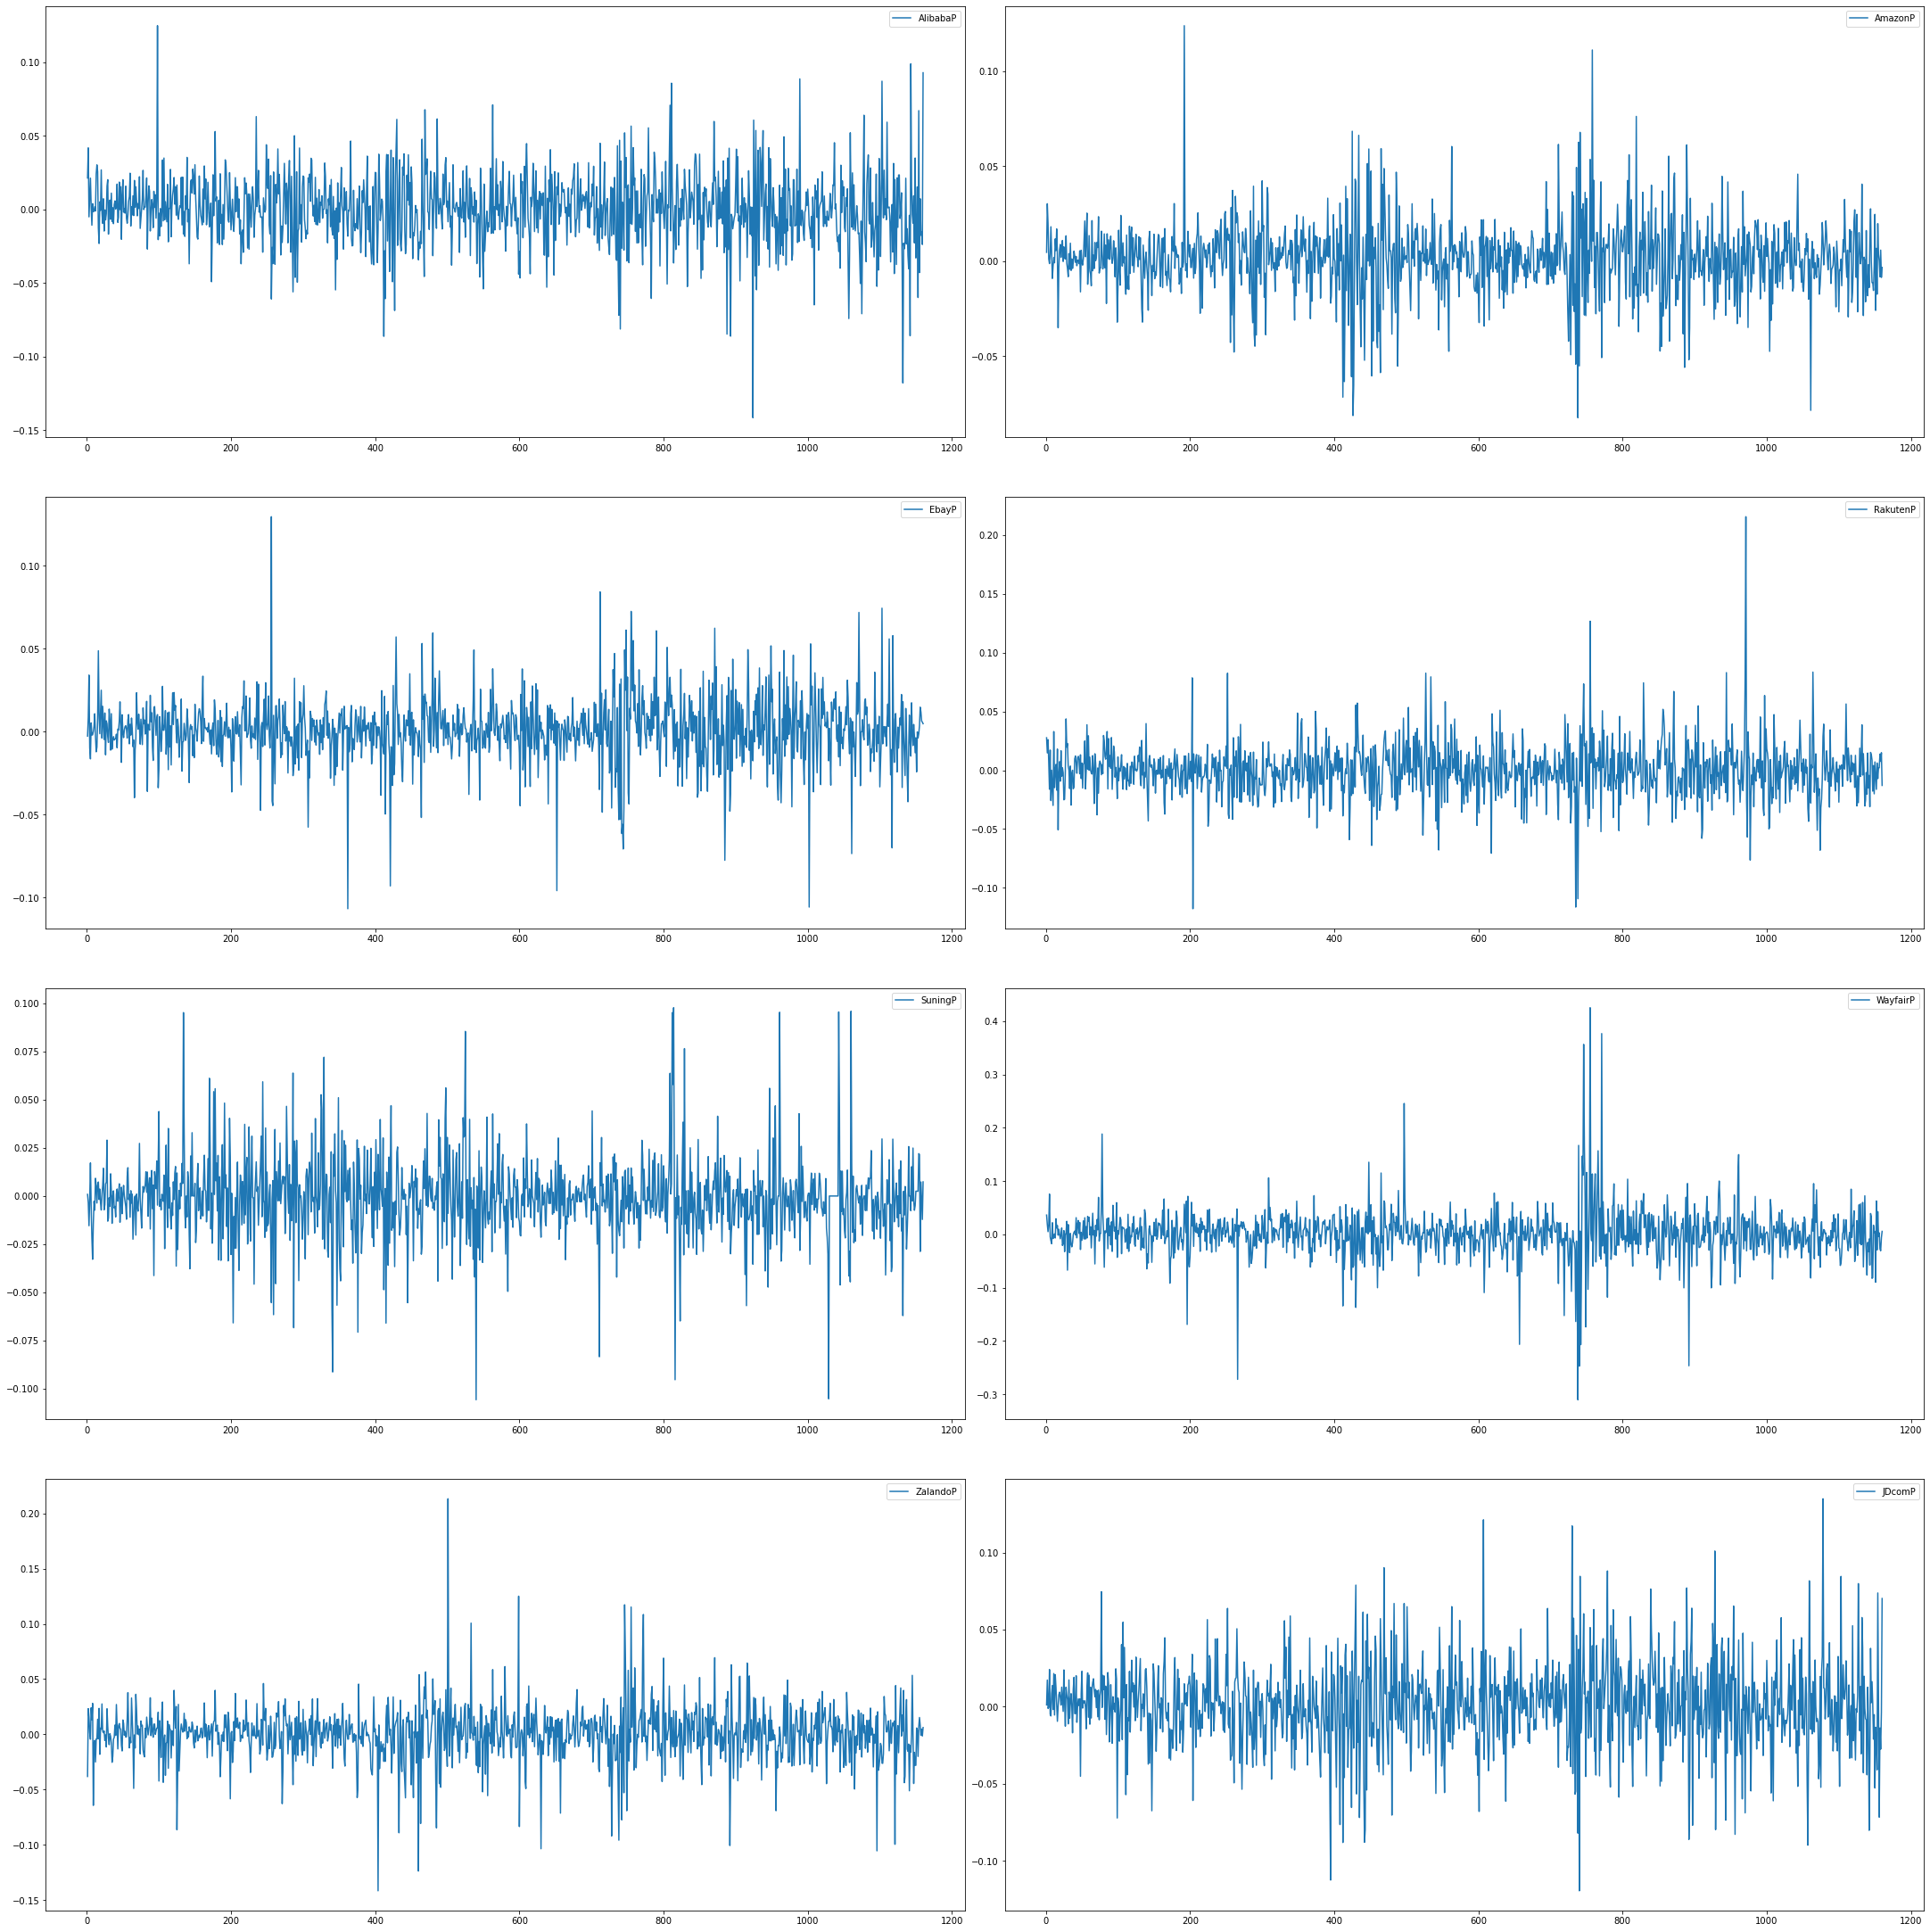

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
index = 0
axs = axs.flatten()
for k in dfret.items():
    sns.lineplot(data = k,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [31]:
# Finding the simple covariance matrix from a series of returns
covar = dfret.cov()
print(covar)

          AlibabaP   AmazonP     EbayP  RakutenP   SuningP  WayfairP  \
AlibabaP  0.000568  0.000214  0.000141  0.000105  0.000073  0.000308   
AmazonP   0.000214  0.000366  0.000133  0.000080  0.000027  0.000307   
EbayP     0.000141  0.000133  0.000378  0.000080  0.000028  0.000289   
RakutenP  0.000105  0.000080  0.000080  0.000520  0.000043  0.000202   
SuningP   0.000073  0.000027  0.000028  0.000043  0.000423  0.000103   
WayfairP  0.000308  0.000307  0.000289  0.000202  0.000103  0.002131   
ZalandoP  0.000120  0.000115  0.000113  0.000091  0.000055  0.000335   
JDcomP    0.000430  0.000243  0.000164  0.000116  0.000064  0.000355   

          ZalandoP    JDcomP  
AlibabaP  0.000120  0.000430  
AmazonP   0.000115  0.000243  
EbayP     0.000113  0.000164  
RakutenP  0.000091  0.000116  
SuningP   0.000055  0.000064  
WayfairP  0.000335  0.000355  
ZalandoP  0.000610  0.000169  
JDcomP    0.000169  0.000767  


In [32]:
# Finding the simple correlation matrix from a series of returns
corr_matrix = dfret.corr()
print(corr_matrix)

          AlibabaP   AmazonP     EbayP  RakutenP   SuningP  WayfairP  \
AlibabaP  1.000000  0.469633  0.304793  0.192598  0.148897  0.280226   
AmazonP   0.469633  1.000000  0.356632  0.183431  0.067568  0.348132   
EbayP     0.304793  0.356632  1.000000  0.181259  0.070084  0.322172   
RakutenP  0.192598  0.183431  0.181259  1.000000  0.091049  0.191544   
SuningP   0.148897  0.067568  0.070084  0.091049  1.000000  0.108223   
WayfairP  0.280226  0.348132  0.322172  0.191544  0.108223  1.000000   
ZalandoP  0.203696  0.242445  0.236042  0.161165  0.108273  0.293582   
JDcomP    0.651556  0.458592  0.304356  0.184363  0.113146  0.277591   

          ZalandoP    JDcomP  
AlibabaP  0.203696  0.651556  
AmazonP   0.242445  0.458592  
EbayP     0.236042  0.304356  
RakutenP  0.161165  0.184363  
SuningP   0.108273  0.113146  
WayfairP  0.293582  0.277591  
ZalandoP  1.000000  0.247294  
JDcomP    0.247294  1.000000  


In [33]:
count = np.isinf(dfret).values.sum() ### Checking for infinite values using isinf() and displaying the count
print(count)

0


In [34]:
### Calculating daily cumulative return over 5 years
dfcumuret=(dfret+1).cumprod() 
### cumprod() returns a series of the same length as the original input series, containing the cumulative product
print(dfcumuret)

      AlibabaP   AmazonP     EbayP  RakutenP   SuningP  WayfairP  ZalandoP  \
1     1.021329  1.004646  0.997315  1.027605  1.000848  1.036286  0.961899   
2     1.063982  1.035057  1.005658  1.042755  0.997449  1.055704  0.984265   
3     1.058557  1.055464  1.039919  1.069867  0.982064  1.061087  0.999803   
4     1.067873  1.056696  1.029823  1.076962  0.980367  1.080505  1.001274   
5     1.090518  1.055343  1.012940  1.059533  0.997183  1.162241  0.996848   
...        ...       ...       ...       ...       ...       ...       ...   
1156  0.967080  3.671289  1.816915  0.737815  0.281117  1.703261  1.327109   
1157  0.950061  3.641141  1.838348  0.747940  0.283162  1.656880  1.325980   
1158  0.935361  3.662357  1.850070  0.753582  0.282477  1.605952  1.332363   
1159  0.913016  3.630891  1.860678  0.764824  0.279036  1.596431  1.330479   
1160  0.997745  3.618929  1.869616  0.754945  0.281080  1.605482  1.338734   

        JDcomP  
1     1.001161  
2     1.018440  
3     1.0172

<Figure size 432x288 with 0 Axes>

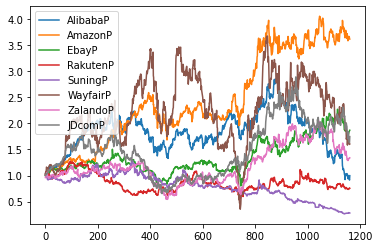

In [35]:
fig = plt.figure()
(dfret + 1).cumprod().plot()
plt.show()

In [36]:
### Ref: https://www.kaggle.com/code/trangthvu/efficient-frontier-optimization/notebook
import scipy
### All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

### The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((dfret.shape[1],), dtype=int),1,1) 
  ### 1,1 in argument of LinearConstraint refers to Lb, Ub in Lb <= A.dot(w) <= Ub; if Lb=Ub, it implies equality constraint
  ### df.shape[0] refers to no. rows, .shape[1] refers to no. cols; np.ones fill up with ones  
  ### Above -- np.ones((dfret.shape[1],), dtype=int) is A, i.e. 1 x 8 elements of ones since dfret.shape[1] gives dim of cols
  ### Then A'w = 1 is the constraint, i.e. sum of wts must equal to one

covar = dfret.cov()
r = np.mean(dfret,axis=0)*252
### axis=0 means to apply calculation “column-wise”, axis=1 means to:apply calculation “row-wise”, 
### r is annualized vector mean return
### Here. mean is calculated for each XYZ stock return time series (column)

def ret(r,w):
    return r.dot(w)                              ### Note ret(r,w) is defined here. r.dot(w) is matrix multiplication of r and w
def vol(w,covar):                                ### Risk level or volatility
    return np.sqrt(np.dot(w,np.dot(w,covar))*252)### same as sqrt of w^T \Sigma w *252 -- annualized return volatility
def sharpe (ret,vol):
    return ret/vol

### Find a portfolio with the minimum risk.
from scipy.optimize import minimize
### Create x0, the first guess at the values of each stock's weight.
weights = np.ones(dfret.shape[1])
x0 = weights/np.sum(weights)

### Define a function to calculate volatility
portfstderr = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)  ### w is input to function lambda that outputs portfvola
res1 = minimize(portfstderr,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
   ### constraint means unit vector .dot(w) = 1; minmize chooses wts w

### Objective function is portfstderr
### 'trust-constr' is to minimize a scalar function subject to constraints -- algorithm updates x0 till obj fn portfvola is min
### minimize(..) function returns optimal weight w_min
### These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res1.x   
### optimization full output.x gives the solution array

np.set_printoptions(suppress = True, precision=3)
### Suppress=True means always printing floating point numbers to 3 decimal places

print(w_min)
print('return: % .4f'% (ret(r,w_min)), 'risk: % .4f'% vol(w_min,covar))  ### this is min var portfolio
### “print” treats the % as a special character you need to add, so it can know, that when you type “f”
###   the number (result) that will be printed will be a floating point type, and the “.4” tells your “print” 
###   to print only the first 4 digits after the point.

[0.036 0.21  0.209 0.165 0.278 0.    0.102 0.   ]
return:  0.0622 risk:  0.1908


In [37]:
### Define 1/Sharpe_ratio as invSharpe
invSharpe  = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)/r.dot(w)
res2 = minimize(invSharpe,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
### Objective function is invSharpe -- inverse of Sharpe ratio
#These are the weights of the stocks in the portfolio with the highest Sharpe ratio - call the weight vector w_Sharpe

w_Sharpe = res2.x
   ### constraint means unit vector .dot(w) = 1; minmize chooses wts w
   ### optimization full output.x gives the solution array of optimal weights in min inverse Sharpe ratio or max Sharpe ratio

print(w_Sharpe)
print('return: % .4f'% (ret(r,w_Sharpe)), 'risk: % .4f'% vol(w_Sharpe,covar))  ### this is max Sharpe ratio portfolio
### “print” treats the % as a special character you need to add, so it can know, that when you type “f”
###   the number (result) that will be printed will be a floating point type, and the “.4” tells your “print” 
###   to print only the first 4 digits after the point.

print( 1/(  np.sqrt(np.dot(w_Sharpe,np.dot(w_Sharpe,covar))*252)/r.dot(w_Sharpe) ) )
### Above is optimized objective function -- the max Sharpe ratio.
### It can also be found using print(sharpe(ret(r,w_Sharpe),vol(w_Sharpe,covar)))

[0.    0.768 0.171 0.    0.    0.03  0.031 0.   ]
return:  0.2969 risk:  0.2697
1.1006526861512465


******************************************************************


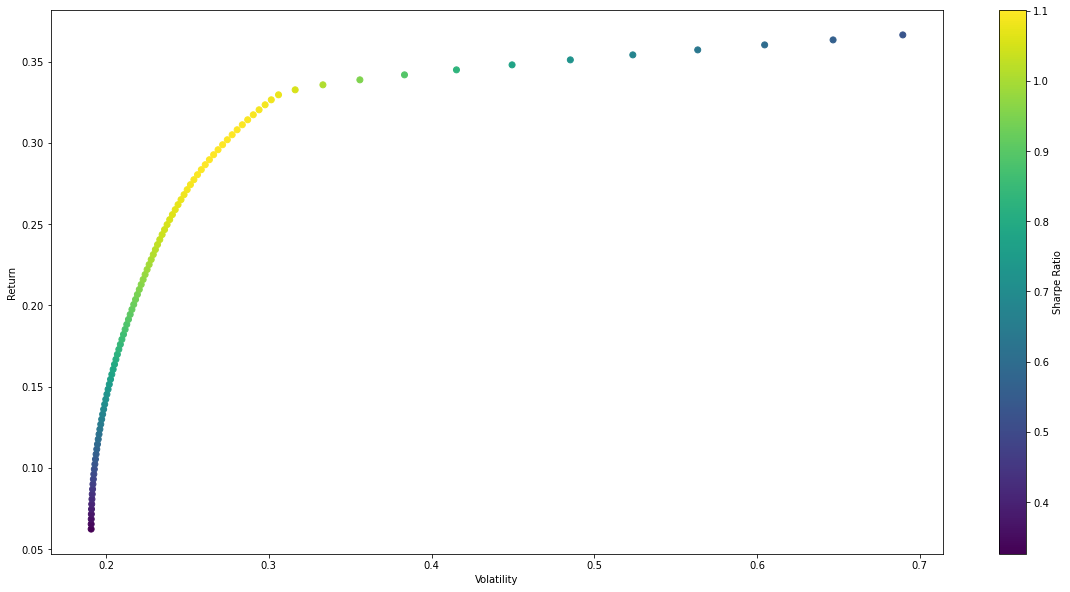

In [38]:
w = w_min ### w is now optimal portfolio weights, sum to 1 
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports
### np.amax in numpy returns max in the array -- since weights sum to 1 and are bounded in (0,1). max portf ret is amax(r)
### The aboove range given by gap starts at ret given by Min Var Portf to Max of all mean returns -- maximum possibe

all_weights = np.zeros((num_ports, len(dfret.columns))) ### all_weights is 2D 100 x 8 zero matrix
### Note: len(dfret.columns) is 8 -- there are 8 stocks here
### print(np.shape(all_weights)) gives (100,8) -- same as print(all_weights.shape) that gives (100,8)

print("******************************************************************")
##########################################################################################################################
### First note that in Python, a Tuple is a grouping of unnamed, ordered values that can be of different types; an
###   array is a collection where elements' values can be changed, and are of a single type
###   all_weights is a 2D array of 100 rows each with 8 cols. all_weight[0] below is the first 1D sub-array that is 1st row
### Note: all_weights[0] is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. first row of 100 x 8 all_weight
### Note: all_weights[1] is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. second row of 100 x 8 all_weight
### .........
### Note: all_weights[99 is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. 100th row of 100 x 8 all_weight
### print(all_weights[0].shape) gives (8,) -- a 1-tuple with 8 elements
### print(all_weights.shape[0]) gives 100, i.e. dimension of the rows
### print(all_weights.shape[1]) gives 8, i.e. dim of the cols
##########################################################################################################################

ret_arr = np.zeros(num_ports) ### this is a 1-tuple of 100 zeros
### Note: print(ret_arr.shape) gives (100,) -- this is a 1D tuple
###       print(ret_arr.shape[0]) gives 100, the number of elements in 1D tuple
###       if we print(ret_arr.shape[1]) --- this gives "tuple index out of range" as there is no other dimension
### If we use instead ret_arr = np.zeros((num_ports,1)), then print(ret_arr.shape) gives (100,1), a dataframe with one column

vol_arr = np.zeros(num_ports)

for i in range(num_ports): ### this means looping from i=0 to 1,2,3,4,....,99 (100 loops in total)
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(dfret.shape[1]),r],[1,port_ret],[1,port_ret])
    ### above means left term in first bracket np.ones(dfret.shape[1]) or A * w >< first term in 2nd,3rd brackets 1,1; 
    ### right term in first bracket r * w >< second terms in 2nd, 3rd brackets port_ret 
    ### i.e. constraints port wts sum to 1 and portf exp return == port_ret
    
    ### Create x0: initial guesses for weights.
    x0 = w_min
    ### Define a function for annualized portfolio volatility.
    portfvola = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)
    res = minimize(portfvola,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
       ### Above double constraints mean unit vector .dot(w) = 1; r .dot(w) = port_ret; minimize chooses wts w
    all_weights[i,:]=res.x ### i row x 8 optimal wts (at row i)
    ret_arr[i]=port_ret
    vol_arr[i]=vol(res.x,covar)
    
### Indented paras after "for i..." form the loop

sharpe_arr = ret_arr/vol_arr  ### sharpe_arr is 100 x 1 array since it is ret_arr[100]/vol_arr[100] element by element

plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
### in plt.scatter, c is a scalar or sequence of n numbers to be mapped to colors using cmap 
### in plt, for sequential plots, 'viridis' gives colors across the 3D representation of vol_arr, ret_arr, sharpe_arr
### c= in front of third dimension sharpe_arr gives the colors in that dimension, otherwise dots will be all blue
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [39]:
dfret.shape

(1160, 8)

In [40]:
t1=pd.concat([dy,mth,yr],axis=1) ### Axis=1 is important -- aligning columns
t1=t1.iloc[1:,:]
print(t1)

       day  month    year
1      4.0    1.0  2017.0
2      5.0    1.0  2017.0
3      6.0    1.0  2017.0
4      9.0    1.0  2017.0
5     10.0    1.0  2017.0
...    ...    ...     ...
1156  23.0   12.0  2021.0
1157  27.0   12.0  2021.0
1158  28.0   12.0  2021.0
1159  29.0   12.0  2021.0
1160  30.0   12.0  2021.0

[1160 rows x 3 columns]


In [41]:
t1.shape

(1160, 3)

In [42]:
dfret1=pd.concat([dfret, t1],axis=1)

In [43]:
print(dfret1)

      AlibabaP   AmazonP     EbayP  RakutenP   SuningP  WayfairP  ZalandoP  \
1     0.021329  0.004646 -0.002685  0.027605  0.000848  0.036286 -0.038101   
2     0.041763  0.030270  0.008365  0.014742 -0.003396  0.018738  0.023252   
3    -0.005099  0.019716  0.034068  0.026001 -0.015424  0.005099  0.015787   
4     0.008801  0.001168 -0.009709  0.006632 -0.001729  0.018300  0.001472   
5     0.021205 -0.001281 -0.016394 -0.016183  0.017153  0.075646 -0.004421   
...        ...       ...       ...       ...       ...       ...       ...   
1156  0.007189  0.000184  0.014748  0.002049 -0.028779  0.002842  0.007973   
1157 -0.017599 -0.008212  0.011797  0.013723  0.007273 -0.027230 -0.000851   
1158 -0.015472  0.005827  0.006376  0.007543 -0.002418 -0.030737  0.004814   
1159 -0.023889 -0.008592  0.005734  0.014918 -0.012180 -0.005929 -0.001414   
1160  0.092801 -0.003294  0.004803 -0.012916  0.007326  0.005669  0.006204   

        JDcomP   day  month    year  
1     0.001161   4.0    1

In [44]:
import pandas as pd
dfret1.to_csv('ret_portecom.csv')